In [1]:
import netCDF4 as nc
import numpy as np
import xarray as xr
from salishsea_tools import nc_tools, viz_tools, grid_tools, geo_tools
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.signal as signal
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [58]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
nemo_ji = np.array([(400, 25), (350,35), (300,40), (240,120), (250,50), (200,120), (150,150), 
                    (100,170), (50,180)]) + (335,115)

In [3]:
grid = xr.open_dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
atmos_grid = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaAtmosphereGridV1')

In [4]:
winds_data = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')

In [5]:
NEMO_bathymetry = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

(115, 300)

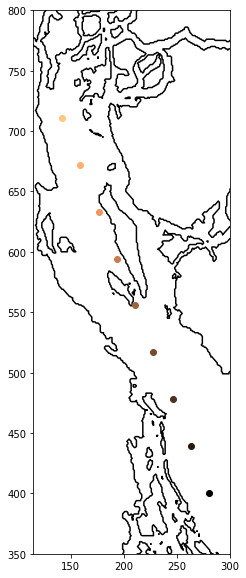

In [67]:
ys = np.round(np.linspace(400, 750, 10))
xs = np.round(np.linspace(280, 125, 10))
fig, ax = plt.subplots(figsize = (10,10))
colours = cm.copper(np.linspace(0,1,9))
for n, colour in zip(range(10), colours):
    ax.plot(xs[n], ys[n], 'o', color = colour)
viz_tools.set_aspect(ax)
viz_tools.plot_coastline(ax, NEMO_bathymetry)
ax.set_ylim(350, 800)
ax.set_xlim(115,300)

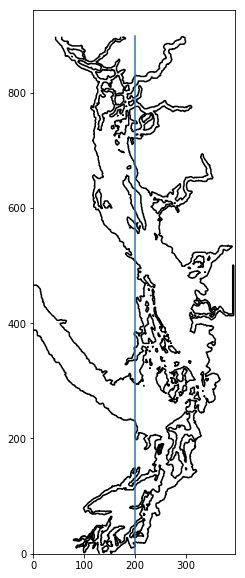

In [68]:
fig, ax = plt.subplots(figsize = (10,10))
colours = cm.copper(np.linspace(0,1,9))
ax.plot(200*np.ones((10)), np.linspace(0,898, 10))
viz_tools.set_aspect(ax)
viz_tools.plot_coastline(ax, NEMO_bathymetry)

In [16]:
import scipy.signal as signal
N  = 1    # Filter order
Wn = 1/24 # Cutoff frequency
B, A = signal.butter(N, Wn)

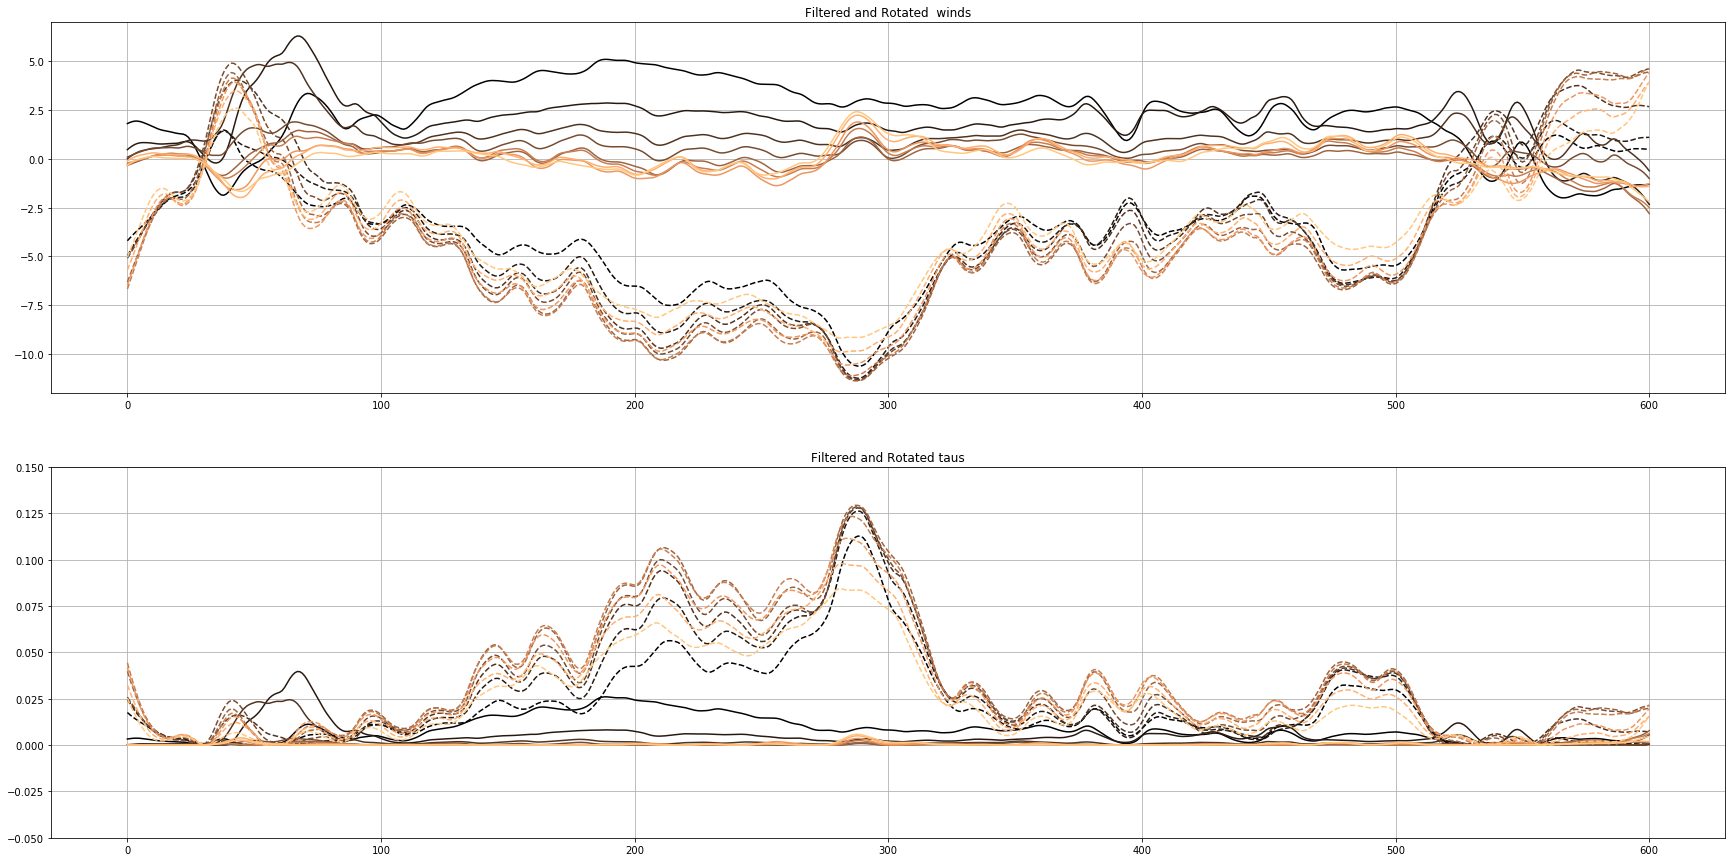

In [54]:
time_slice = slice('2015-05-31 12:00:00', '2015-06-25 12:00:00')
N = 1
Wn = 1/24
B, A = signal.butter(N,Wn)
colours = cm.copper(np.linspace(0,1,9))
fig,axs = plt.subplots(2,1, figsize=(30,15))
for n, colour in zip(range(10), colours):
    atmos_ji = geo_tools.find_closest_model_point(
        NEMO_bathymetry.variables['nav_lon'][ys[n],xs[n]], 
        NEMO_bathymetry.variables['nav_lat'][ys[n], xs[n]],
        atmos_grid.longitude.values - 360, atmos_grid.latitude.values,
        grid = "GEM2.5")
    u_wind_ts = (winds_data.u_wind
                 .isel(gridY=atmos_ji[0], gridX=atmos_ji[1])
                 .sel(time=time_slice))
    v_wind_ts = (winds_data.v_wind
                 .isel(gridY=atmos_ji[0], gridX=atmos_ji[1])
                 .sel(time=time_slice))
    rotated_u_winds, rotated_v_winds = viz_tools.rotate_vel(u_wind_ts.values, 
                                                       v_wind_ts.values, origin = 'map' )
    windfu = signal.filtfilt(B,A, rotated_u_winds)
    windfv = signal.filtfilt(B,A,rotated_v_winds)
    axs[0].plot(range(windfu.shape[0]), windfu, color = colour, label = 'U winds')
    axs[1].plot(range(windfu.shape[0]), windfu**2 * 10**(-3), color = colour, label = 'utau')
    axs[0].set_title('Filtered and Rotated  winds')
    axs[0].plot(range(windfv.shape[0]), windfv, '--', color = colour, label = 'V winds') 
    axs[1].plot(range(windfv.shape[0]), windfv**2 * 10**(-3),'--',  color = colour, label = 'vtau') 
    axs[1].set_title('Filtered and Rotated taus')
axs[0].set_ylim(-12,7)
axs[1].set_ylim(-0.05,0.15)
axs[0].grid()
axs[1].grid()

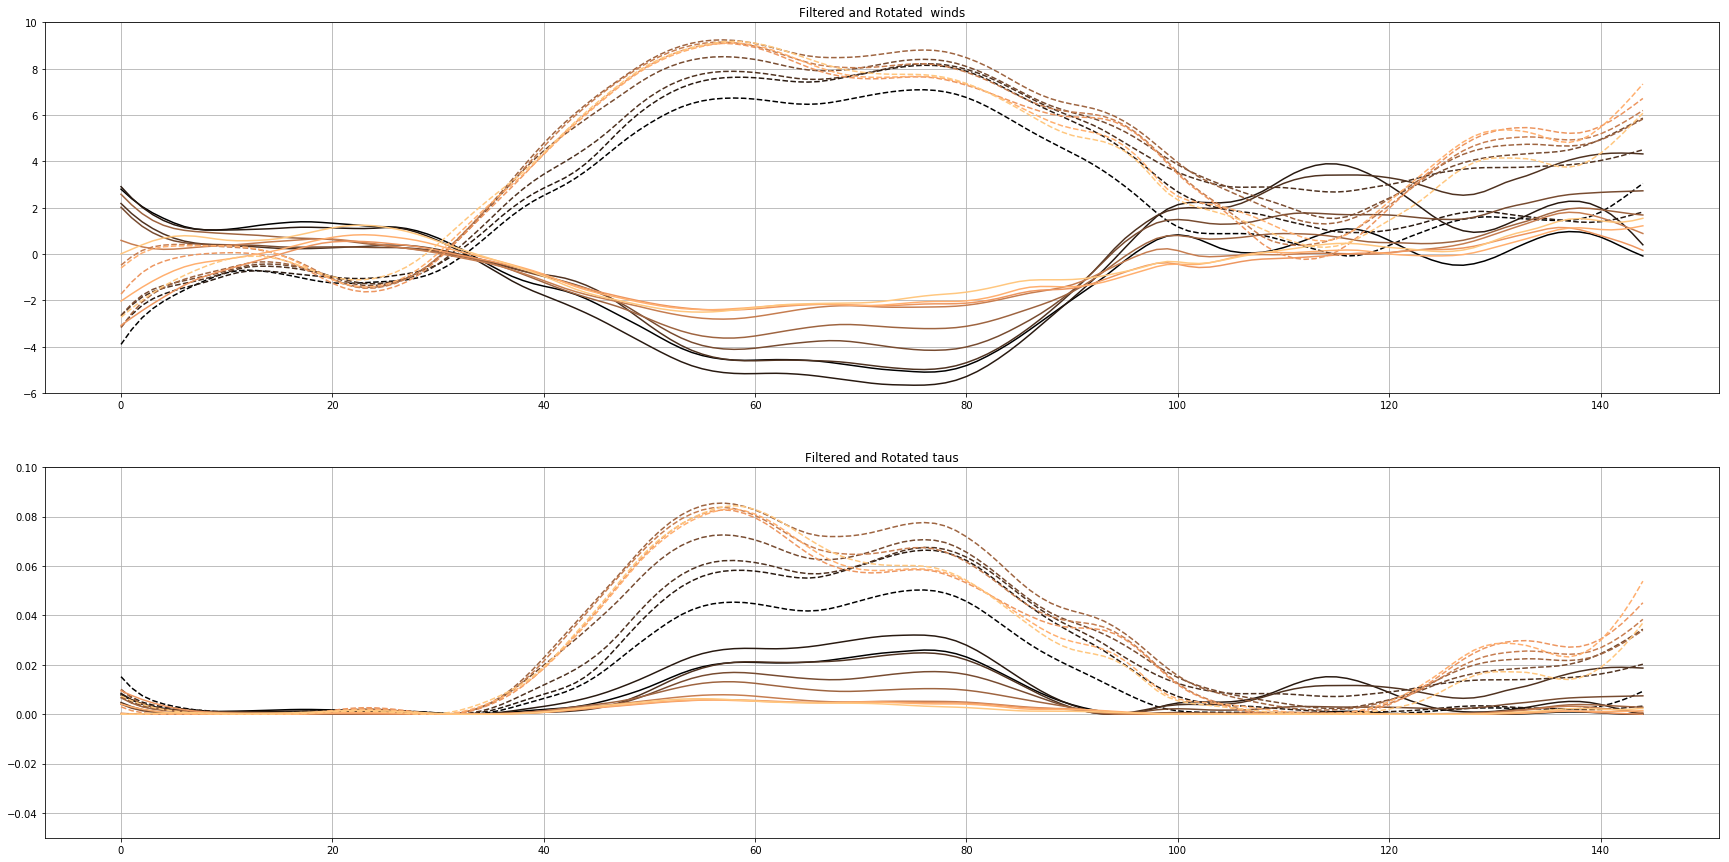

In [55]:
time_slice = slice('2015-04-24 12:00:00', '2015-04-30 12:00:00')
N = 1
Wn = 1/24
B, A = signal.butter(N,Wn)
colours = cm.copper(np.linspace(0,1,9))
fig,axs = plt.subplots(2,1, figsize=(30,15))
for n, colour in zip(range(10), colours):
    atmos_ji = geo_tools.find_closest_model_point(
        NEMO_bathymetry.variables['nav_lon'][ys[n],xs[n]], 
        NEMO_bathymetry.variables['nav_lat'][ys[n], xs[n]],
        atmos_grid.longitude.values - 360, atmos_grid.latitude.values,
        grid = "GEM2.5")
    u_wind_ts = (winds_data.u_wind
                 .isel(gridY=atmos_ji[0], gridX=atmos_ji[1])
                 .sel(time=time_slice))
    v_wind_ts = (winds_data.v_wind
                 .isel(gridY=atmos_ji[0], gridX=atmos_ji[1])
                 .sel(time=time_slice))
    rotated_u_winds, rotated_v_winds = viz_tools.rotate_vel(u_wind_ts.values, 
                                                       v_wind_ts.values, origin = 'map' )
    windfu = signal.filtfilt(B,A, rotated_u_winds)
    windfv = signal.filtfilt(B,A,rotated_v_winds)
    axs[0].plot(range(windfu.shape[0]), windfu, color = colour, label = 'U winds')
    axs[1].plot(range(windfu.shape[0]), windfu**2 * 10**(-3), color = colour, label = 'utau')
    axs[0].set_title('Filtered and Rotated  winds')
    axs[0].plot(range(windfv.shape[0]), windfv, '--', color = colour, label = 'V winds') 
    axs[1].plot(range(windfv.shape[0]), windfv**2 * 10**(-3),'--',  color = colour, label = 'vtau') 
    axs[1].set_title('Filtered and Rotated taus')
axs[0].set_ylim(-6,10)
axs[1].set_ylim(-0.05,0.1)
axs[0].grid()
axs[1].grid()

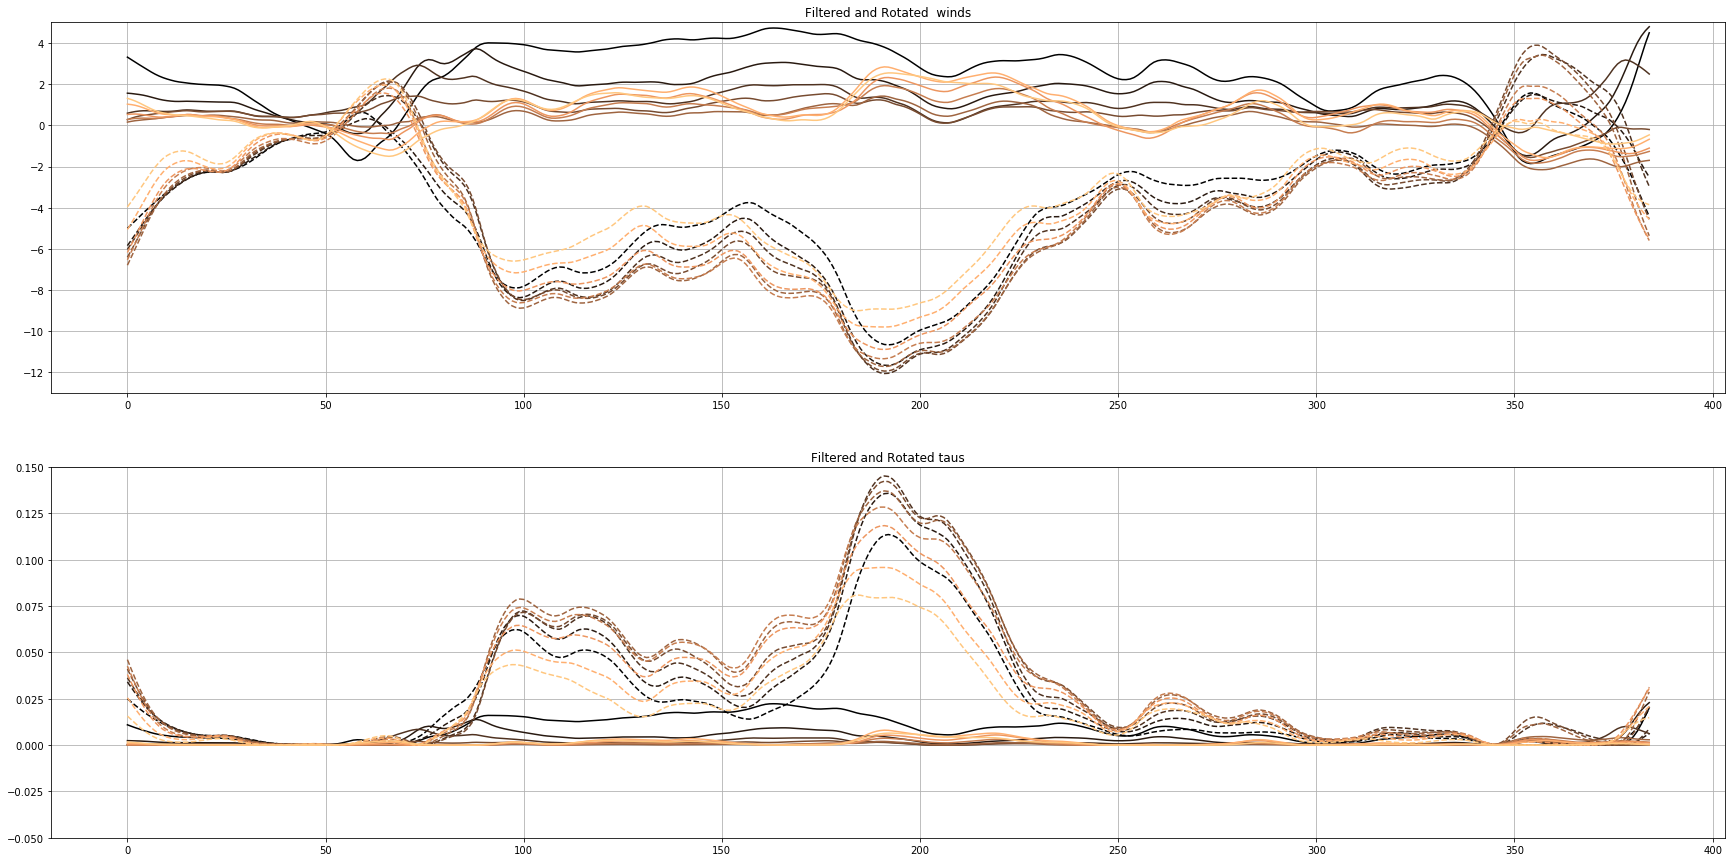

In [56]:
time_slice = slice('2016-04-30 12:00:00', '2016-05-16 12:00:00')
N = 1
Wn = 1/24
B, A = signal.butter(N,Wn)
colours = cm.copper(np.linspace(0,1,9))
fig,axs = plt.subplots(2,1, figsize=(30,15))
for n, colour in zip(range(10), colours):
    atmos_ji = geo_tools.find_closest_model_point(
        NEMO_bathymetry.variables['nav_lon'][ys[n],xs[n]], 
        NEMO_bathymetry.variables['nav_lat'][ys[n], xs[n]],
        atmos_grid.longitude.values - 360, atmos_grid.latitude.values,
        grid = "GEM2.5")
    u_wind_ts = (winds_data.u_wind
                 .isel(gridY=atmos_ji[0], gridX=atmos_ji[1])
                 .sel(time=time_slice))
    v_wind_ts = (winds_data.v_wind
                 .isel(gridY=atmos_ji[0], gridX=atmos_ji[1])
                 .sel(time=time_slice))
    rotated_u_winds, rotated_v_winds = viz_tools.rotate_vel(u_wind_ts.values, 
                                                       v_wind_ts.values, origin = 'map' )
    windfu = signal.filtfilt(B,A, rotated_u_winds)
    windfv = signal.filtfilt(B,A,rotated_v_winds)
    axs[0].plot(range(windfu.shape[0]), windfu, color = colour, label = 'U winds')
    axs[1].plot(range(windfu.shape[0]), windfu**2 * 10**(-3), color = colour, label = 'utau')
    axs[0].set_title('Filtered and Rotated  winds')
    axs[0].plot(range(windfv.shape[0]), windfv, '--', color = colour, label = 'V winds') 
    axs[1].plot(range(windfv.shape[0]), windfv**2 * 10**(-3),'--',  color = colour, label = 'vtau') 
    axs[1].set_title('Filtered and Rotated taus')
axs[0].set_ylim(-13,5)
axs[1].set_ylim(-0.05,0.15)
axs[0].grid()
axs[1].grid()

In [69]:
import datetime

In [242]:
datetime.datetime.strptime('2016-04-30 12:00:00', '%Y-%m-%d %H:%M:%S') + datetime.timedelta(hours = 190)

datetime.datetime(2016, 5, 8, 10, 0)

# June 2015, Quadra

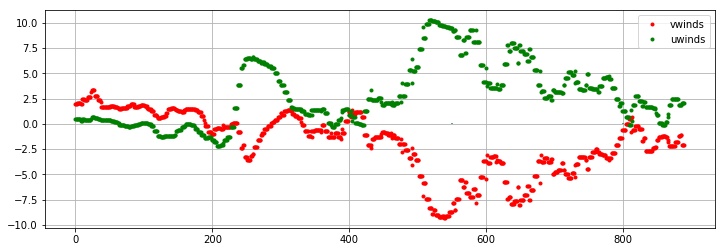

In [249]:
fig, ax = plt.subplots(figsize = (12,4))
vwinds = np.array([])
uwinds = np.array([])
for n in range(898):
    Yind , Xind = geo_tools.find_closest_model_point(
        NEMO_bathymetry.variables['nav_lon'][n,200],
        NEMO_bathymetry.variables['nav_lat'][n,200],
        atmos_grid.longitude.values - 360, atmos_grid.latitude.values,
        grid = "GEM2.5")
    if type(Yind) == int:
        vwinds = np.append(vwinds, (winds_data.v_wind
                 .isel(gridY=Yind, gridX = Xind)
                 .sel(time=datetime.datetime(2015, 6, 12, 14, 0))).values)
        uwinds = np.append(uwinds, (winds_data.u_wind
                 .isel(gridY=Yind, gridX = Xind)
                 .sel(time=datetime.datetime(2015, 6, 12, 14, 0))).values)


ax.plot(range(len(vwinds)), vwinds, 'r.', label = 'vwinds')
ax.plot(range(len(uwinds)), uwinds, 'g.', label = 'uwinds')
ax.plot((550,550), (-0.001,0.03),'--', color='SeaGreen')
ax.plot((800, 800), (-0.001,0.03),'--', color='SeaGreen')
ax.legend()
ax.grid('on');

In [210]:
import scipy.integrate

[  6.65783595e-10  -7.61414366e-07   1.71398229e-04  -3.95688563e-03]
integral of idealized vwind = -10.146610152943799
integral of actual vwind = -10.1410481881
idealized - actual = -0.00556196479386
[ -6.49244146e-10   6.84927609e-07  -1.20374232e-04   4.24076757e-03]
integral of idealized uwind = 15.231234053935529
integral of actual uwind = 15.2223774295
idealized - actual = 0.00885662440719


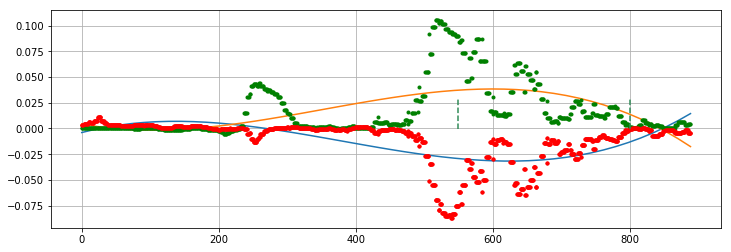

In [238]:
fig, ax = plt.subplots(figsize = (12,4))
z = np.polyfit(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 3)
print(z)
f = np.poly1d(z)

x_new = np.linspace(0, len(vwinds)-1, 50)
y_new = f(x_new) 
ax.plot(x_new, y_new)
print('integral of idealized vwind = ' + str(scipy.integrate.quad(f,0, len(vwinds)-1 )[0]))
ax.plot(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 'r.')
print('integral of actual vwind = ' + str(np.trapz(vwinds*np.abs(vwinds) * 10**(-3))))
print('idealized - actual = ' + str(scipy.integrate.quad(f,0, len(vwinds)-1 )[0] 
                                    - np.trapz(vwinds*np.abs(vwinds) * 10**(-3))))

for n in range(3,4):
    z = np.polyfit(range(len(uwinds)), uwinds*np.abs(uwinds) * 10**(-3), n)
    print(z)
    f = np.poly1d(z)

    x_new = np.linspace(0, len(uwinds)-1, 50)
    y_new = f(x_new) 
    ax.plot(x_new, y_new, label = n)
    
ax.plot(range(len(uwinds)), uwinds*np.abs(uwinds) * 10**(-3), 'g.')
print('integral of idealized uwind = ' + str(scipy.integrate.quad(f,0, len(uwinds)-1 )[0]))
ax.plot(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 'r.')
print('integral of actual uwind = ' + str(np.trapz(uwinds*np.abs(uwinds) * 10**(-3))))
print('idealized - actual = ' + str(scipy.integrate.quad(f,0, len(uwinds)-1 )[0] 
                                    - np.trapz(uwinds*np.abs(uwinds) * 10**(-3))))

ax.plot((550,550), (-0.001,0.03),'--', color='SeaGreen')
ax.plot((800, 800), (-0.001,0.03),'--', color='SeaGreen')
ax.grid('on')

### 2nd degree fit

[  1.26408058e-07  -1.44133994e-04   1.93530697e-02]
integral of idealized vwind = -10.146610152943907
integral of actual vwind = -10.1410481881
idealized - actual = -0.00556196479397
[ -1.80839459e-07   1.87319514e-04  -1.84901200e-02]
integral of idealized uwind = 15.231234053935653
integral of actual uwind = 15.2223774295
idealized - actual = 0.00885662440731


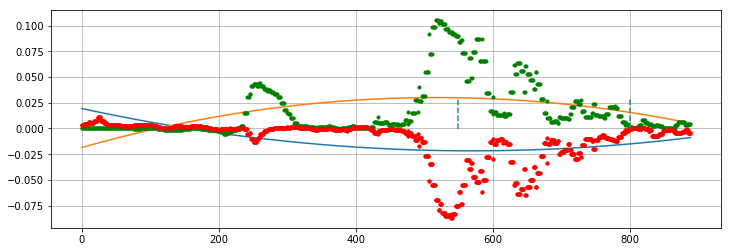

In [250]:
fig, ax = plt.subplots(figsize = (12,4))
z = np.polyfit(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 2)
print(z)
f = np.poly1d(z)

x_new = np.linspace(0, len(vwinds)-1, 50)
y_new = f(x_new) 
ax.plot(x_new, y_new)
print('integral of idealized vwind = ' + str(scipy.integrate.quad(f,0, len(vwinds)-1 )[0]))
ax.plot(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 'r.')
print('integral of actual vwind = ' + str(np.trapz(vwinds*np.abs(vwinds) * 10**(-3))))
print('idealized - actual = ' + str(scipy.integrate.quad(f,0, len(vwinds)-1 )[0] 
                                    - np.trapz(vwinds*np.abs(vwinds) * 10**(-3))))

for n in range(2,3):
    z = np.polyfit(range(len(uwinds)), uwinds*np.abs(uwinds) * 10**(-3), n)
    print(z)
    f = np.poly1d(z)

    x_new = np.linspace(0, len(uwinds)-1, 50)
    y_new = f(x_new) 
    ax.plot(x_new, y_new, label = n)
    
ax.plot(range(len(uwinds)), uwinds*np.abs(uwinds) * 10**(-3), 'g.')
print('integral of idealized uwind = ' + str(scipy.integrate.quad(f,0, len(uwinds)-1 )[0]))
ax.plot(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 'r.')
print('integral of actual uwind = ' + str(np.trapz(uwinds*np.abs(uwinds) * 10**(-3))))
print('idealized - actual = ' + str(scipy.integrate.quad(f,0, len(uwinds)-1 )[0] 
                                    - np.trapz(uwinds*np.abs(uwinds) * 10**(-3))))

ax.plot((550,550), (-0.001,0.03),'--', color='SeaGreen')
ax.plot((800, 800), (-0.001,0.03),'--', color='SeaGreen')
ax.grid('on')

# April 2015, Baynes Sound

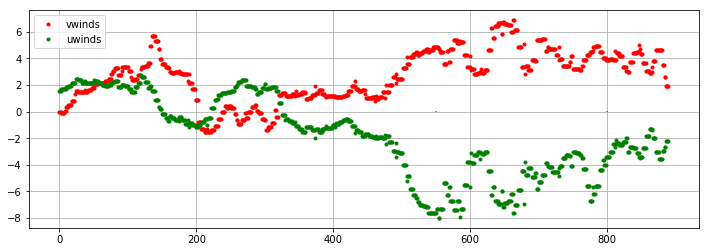

In [245]:
fig, ax = plt.subplots(figsize = (12,4))
vwinds = np.array([])
uwinds = np.array([])
for n in range(898):
    Yind , Xind = geo_tools.find_closest_model_point(
        NEMO_bathymetry.variables['nav_lon'][n,200],
        NEMO_bathymetry.variables['nav_lat'][n,200],
        atmos_grid.longitude.values - 360, atmos_grid.latitude.values,
        grid = "GEM2.5")
    if type(Yind) == int:
        vwinds = np.append(vwinds, (winds_data.v_wind
                 .isel(gridY=Yind, gridX = Xind)
                 .sel(time=datetime.datetime(2015, 4, 26, 22, 0))).values)
        uwinds = np.append(uwinds, (winds_data.u_wind
                 .isel(gridY=Yind, gridX = Xind)
                 .sel(time=datetime.datetime(2015, 4, 26, 22, 0))).values)



ax.plot(range(len(vwinds)), vwinds, 'r.', label = 'vwinds')
ax.plot(range(len(uwinds)), uwinds, 'g.', label = 'uwinds')
ax.plot((550,550), (-0.001,0.03),'--', color='SeaGreen')
ax.plot((800, 800), (-0.001,0.03),'--', color='SeaGreen')
ax.legend()
ax.grid('on');

[ -2.86605409e-10   3.98834952e-07  -1.28352567e-04   1.29665840e-02]
integral of idealized vwind = 9.46000240078944
integral of actual vwind = 9.47097797685
idealized - actual = -0.0109755760638
[  5.84717927e-10  -7.05133199e-07   1.73254696e-04  -4.51198225e-03]
integral of idealized uwind = -9.3840775368524
integral of actual uwind = -9.38351028469
idealized - actual = -0.000567252158442


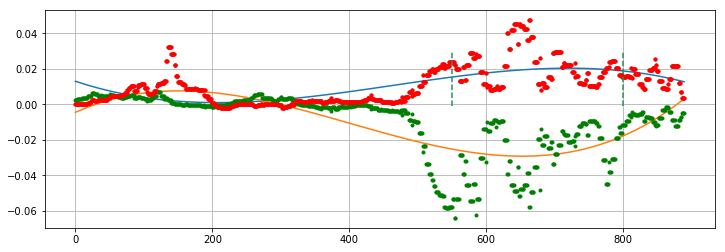

In [241]:
fig, ax = plt.subplots(figsize = (12,4))
z = np.polyfit(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 3)
print(z)
f = np.poly1d(z)

x_new = np.linspace(0, len(vwinds)-1, 50)
y_new = f(x_new) 
ax.plot(x_new, y_new)
print('integral of idealized vwind = ' + str(scipy.integrate.quad(f,0, len(vwinds)-1 )[0]))
ax.plot(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 'r.')
print('integral of actual vwind = ' + str(np.trapz(vwinds*np.abs(vwinds) * 10**(-3))))
print('idealized - actual = ' + str(scipy.integrate.quad(f,0, len(vwinds)-1 )[0] 
                                    - np.trapz(vwinds*np.abs(vwinds) * 10**(-3))))

for n in range(3,4):
    z = np.polyfit(range(len(uwinds)), uwinds*np.abs(uwinds) * 10**(-3), n)
    print(z)
    f = np.poly1d(z)

    x_new = np.linspace(0, len(uwinds)-1, 50)
    y_new = f(x_new) 
    ax.plot(x_new, y_new, label = n)
    
ax.plot(range(len(uwinds)), uwinds*np.abs(uwinds) * 10**(-3), 'g.')
print('integral of idealized uwind = ' + str(scipy.integrate.quad(f,0, len(uwinds)-1 )[0]))
ax.plot(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 'r.')
print('integral of actual uwind = ' + str(np.trapz(uwinds*np.abs(uwinds) * 10**(-3))))
print('idealized - actual = ' + str(scipy.integrate.quad(f,0, len(uwinds)-1 )[0] 
                                    - np.trapz(uwinds*np.abs(uwinds) * 10**(-3))))

ax.plot((550,550), (-0.001,0.03),'--', color='SeaGreen')
ax.plot((800, 800), (-0.001,0.03),'--', color='SeaGreen')
ax.grid('on')

### 2nd degree fit

[  1.66466388e-08   7.47721715e-06   2.93215346e-03]
integral of idealized vwind = 9.46000240078947
integral of actual vwind = 9.47097797685
idealized - actual = -0.0109755760637
[  7.45881574e-08  -1.03858391e-04   1.59597579e-02]
integral of idealized uwind = -9.3840775368525
integral of actual uwind = -9.38351028469
idealized - actual = -0.000567252158541


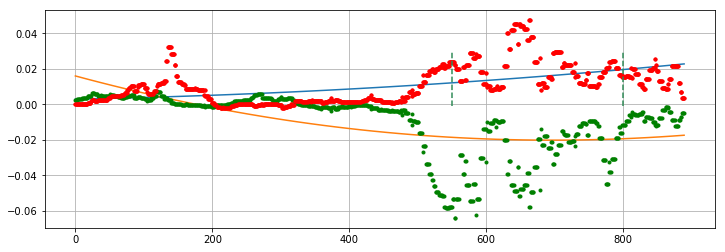

In [246]:
fig, ax = plt.subplots(figsize = (12,4))
z = np.polyfit(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 2)
print(z)
f = np.poly1d(z)

x_new = np.linspace(0, len(vwinds)-1, 50)
y_new = f(x_new) 
ax.plot(x_new, y_new)
print('integral of idealized vwind = ' + str(scipy.integrate.quad(f,0, len(vwinds)-1 )[0]))
ax.plot(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 'r.')
print('integral of actual vwind = ' + str(np.trapz(vwinds*np.abs(vwinds) * 10**(-3))))
print('idealized - actual = ' + str(scipy.integrate.quad(f,0, len(vwinds)-1 )[0] 
                                    - np.trapz(vwinds*np.abs(vwinds) * 10**(-3))))

for n in range(2,3):
    z = np.polyfit(range(len(uwinds)), uwinds*np.abs(uwinds) * 10**(-3), n)
    print(z)
    f = np.poly1d(z)

    x_new = np.linspace(0, len(uwinds)-1, 50)
    y_new = f(x_new) 
    ax.plot(x_new, y_new, label = n)
    
ax.plot(range(len(uwinds)), uwinds*np.abs(uwinds) * 10**(-3), 'g.')
print('integral of idealized uwind = ' + str(scipy.integrate.quad(f,0, len(uwinds)-1 )[0]))
ax.plot(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 'r.')
print('integral of actual uwind = ' + str(np.trapz(uwinds*np.abs(uwinds) * 10**(-3))))
print('idealized - actual = ' + str(scipy.integrate.quad(f,0, len(uwinds)-1 )[0] 
                                    - np.trapz(uwinds*np.abs(uwinds) * 10**(-3))))

ax.plot((550,550), (-0.001,0.03),'--', color='SeaGreen')
ax.plot((800, 800), (-0.001,0.03),'--', color='SeaGreen')
ax.grid('on')

# May 2016, Desolation Sound

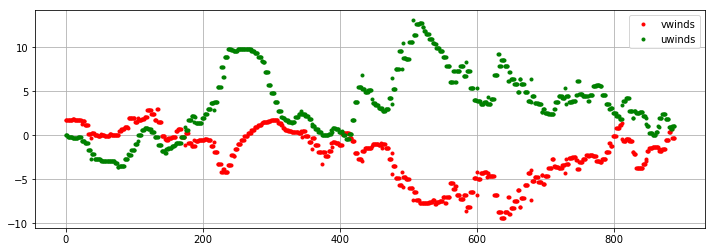

In [251]:
fig, ax = plt.subplots(figsize = (12,4))
vwinds = np.array([])
uwinds = np.array([])
for n in range(898):
    Yind , Xind = geo_tools.find_closest_model_point(
        NEMO_bathymetry.variables['nav_lon'][n,200],
        NEMO_bathymetry.variables['nav_lat'][n,200],
        atmos_grid.longitude.values - 360, atmos_grid.latitude.values,
        grid = "GEM2.5")
    if type(Yind) == int:
        vwinds = np.append(vwinds, (winds_data.v_wind
                 .isel(gridY=Yind, gridX = Xind)
                 .sel(time=datetime.datetime(2016, 5, 8, 10, 0))).values)
        uwinds = np.append(uwinds, (winds_data.u_wind
                 .isel(gridY=Yind, gridX = Xind)
                 .sel(time=datetime.datetime(2016, 5, 8, 10, 0))).values)


ax.plot(range(len(vwinds)), vwinds, 'r.', label = 'vwinds')
ax.plot(range(len(uwinds)), uwinds, 'g.', label = 'uwinds')
ax.plot((550,550), (-0.01,0.06),'--', color='SeaGreen')
ax.plot((800, 800), (-0.01,0.06),'--', color='SeaGreen')
ax.legend()
ax.grid('on');

[  7.43690345e-10  -8.64235552e-07   2.08466302e-04  -8.02476956e-03]
integral of idealized vwind = -11.030402747917607
integral of actual vwind = -11.0273877407
idealized - actual = -0.00301500721306
[ -2.56409604e-10   5.31327521e-08   1.55710328e-04  -1.26215058e-02]
integral of idealized uwind = 22.714834476494012
integral of actual uwind = 22.7017512411
idealized - actual = 0.0130832354304


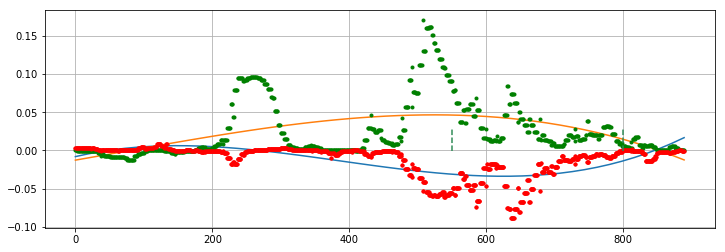

In [244]:
fig, ax = plt.subplots(figsize = (12,4))
z = np.polyfit(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 3)
print(z)
f = np.poly1d(z)

x_new = np.linspace(0, len(vwinds)-1, 50)
y_new = f(x_new) 
ax.plot(x_new, y_new)
print('integral of idealized vwind = ' + str(scipy.integrate.quad(f,0, len(vwinds)-1 )[0]))
ax.plot(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 'r.')
print('integral of actual vwind = ' + str(np.trapz(vwinds*np.abs(vwinds) * 10**(-3))))
print('idealized - actual = ' + str(scipy.integrate.quad(f,0, len(vwinds)-1 )[0] 
                                    - np.trapz(vwinds*np.abs(vwinds) * 10**(-3))))

for n in range(3,4):
    z = np.polyfit(range(len(uwinds)), uwinds*np.abs(uwinds) * 10**(-3), n)
    print(z)
    f = np.poly1d(z)

    x_new = np.linspace(0, len(uwinds)-1, 50)
    y_new = f(x_new) 
    ax.plot(x_new, y_new, label = n)
    
ax.plot(range(len(uwinds)), uwinds*np.abs(uwinds) * 10**(-3), 'g.')
print('integral of idealized uwind = ' + str(scipy.integrate.quad(f,0, len(uwinds)-1 )[0]))
ax.plot(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 'r.')
print('integral of actual uwind = ' + str(np.trapz(uwinds*np.abs(uwinds) * 10**(-3))))
print('idealized - actual = ' + str(scipy.integrate.quad(f,0, len(uwinds)-1 )[0] 
                                    - np.trapz(uwinds*np.abs(uwinds) * 10**(-3))))

ax.plot((550,550), (-0.001,0.03),'--', color='SeaGreen')
ax.plot((800, 800), (-0.001,0.03),'--', color='SeaGreen')
ax.grid('on')

### 2nd degree fit

[  1.27475523e-07  -1.43987963e-04   1.80128030e-02]
integral of idealized vwind = -11.030402747917746
integral of actual vwind = -11.0273877407
idealized - actual = -0.0030150072132
[ -2.88789455e-07   2.77229532e-04  -2.15987417e-02]
integral of idealized uwind = 22.71483447649409
integral of actual uwind = 22.7017512411
idealized - actual = 0.0130832354305
h(x) = 0.0002x
integral of h(x) = 79.0321


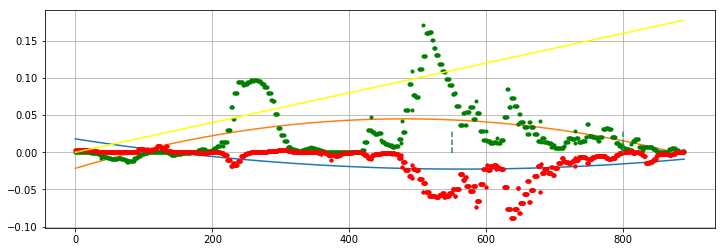

In [269]:
fig, ax = plt.subplots(figsize = (12,4))
z = np.polyfit(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 2)
print(z)
f = np.poly1d(z)

x_new = np.linspace(0, len(vwinds)-1, 50)
y_new = f(x_new) 
ax.plot(x_new, y_new)
print('integral of idealized vwind = ' + str(scipy.integrate.quad(f,0, len(vwinds)-1 )[0]))
ax.plot(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 'r.')
print('integral of actual vwind = ' + str(np.trapz(vwinds*np.abs(vwinds) * 10**(-3))))
print('idealized - actual = ' + str(scipy.integrate.quad(f,0, len(vwinds)-1 )[0] 
                                    - np.trapz(vwinds*np.abs(vwinds) * 10**(-3))))

for n in range(2,3):
    z = np.polyfit(range(len(uwinds)), uwinds*np.abs(uwinds) * 10**(-3), n)
    print(z)
    f = np.poly1d(z)

    x_new = np.linspace(0, len(uwinds)-1, 50)
    y_new = f(x_new) 
    ax.plot(x_new, y_new, label = n)
    
ax.plot(range(len(uwinds)), uwinds*np.abs(uwinds) * 10**(-3), 'g.')
print('integral of idealized uwind = ' + str(scipy.integrate.quad(f,0, len(uwinds)-1 )[0]))
ax.plot(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 'r.')
print('integral of actual uwind = ' + str(np.trapz(uwinds*np.abs(uwinds) * 10**(-3))))
print('idealized - actual = ' + str(scipy.integrate.quad(f,0, len(uwinds)-1 )[0] 
                                    - np.trapz(uwinds*np.abs(uwinds) * 10**(-3))))

ax.plot((550,550), (-0.001,0.03),'--', color='SeaGreen')
ax.plot((800, 800), (-0.001,0.03),'--', color='SeaGreen')
ax.grid('on')

In [273]:
Yinds = np.array([])
Xinds = np.array([])
for n in range(898):
    Yind , Xind = geo_tools.find_closest_model_point(
        NEMO_bathymetry.variables['nav_lon'][n,200],
        NEMO_bathymetry.variables['nav_lat'][n,200],
        atmos_grid.longitude.values - 360, atmos_grid.latitude.values,
        grid = "GEM2.5")
    if type(Yind) == int:
        Yinds = np.append(Yinds, Yind)
        Xinds = np.append(Xinds, Xind)

# Quadra

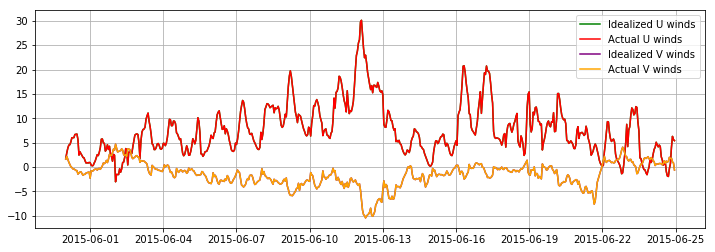

In [282]:
fig, ax = plt.subplots(figsize = (12,4))
dates = np.array([datetime.datetime(2015, 5, 31) + datetime.timedelta(hours = n) 
                  for n in range(24*25)])
list_of_ui = np.array([])
list_of_ur = np.array([])
list_of_vi = np.array([])
list_of_vr = np.array([])
for date in dates:
    vwinds = np.array([])
    uwinds = np.array([])
    for j, i in zip(Yinds, Xinds):
        vwinds = np.append(vwinds, (winds_data.v_wind
                 .isel(gridY=int(j), gridX = int(i))
                 .sel(time=date).values))
        uwinds = np.append(uwinds, (winds_data.u_wind
                 .isel(gridY=int(j), gridX = int(i))
                 .sel(time=date).values))

    z = np.polyfit(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 3)
    f = np.poly1d(z) 
    vi = scipy.integrate.quad(f,0, len(vwinds)-1 )[0]
    vr = np.trapz(vwinds*np.abs(vwinds) * 10**(-3))                           
    list_of_vi = np.append(list_of_vi, vi)
    list_of_vr = np.append(list_of_vr, vr)                         

    z = np.polyfit(range(len(uwinds)), uwinds*np.abs(uwinds) * 10**(-3), 3)
    f = np.poly1d(z)
    ui = scipy.integrate.quad(f,0, len(uwinds)-1 )[0]
    ur = np.trapz(uwinds*np.abs(uwinds) * 10**(-3)) 
    list_of_ui = np.append(list_of_ui, ui)
    list_of_ur = np.append(list_of_ur, ur)


ax.plot(dates, list_of_ui, 'g-', label = 'Idealized U winds')
ax.plot(dates, list_of_ur, 'r-', label = 'Actual U winds')
ax.plot(dates, list_of_vi, color='purple', label = 'Idealized V winds')
ax.plot(dates, list_of_vr, color = 'orange', label = 'Actual V winds')

ax.legend()
ax.grid('on');

# Desolation Sound

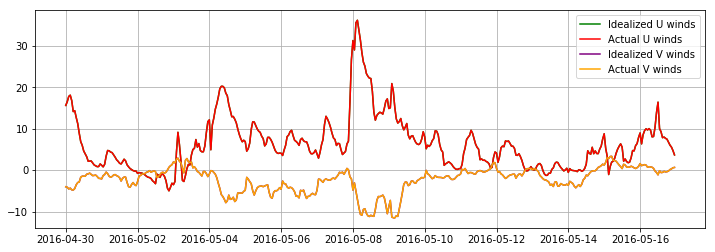

In [283]:
fig, ax = plt.subplots(figsize = (12,4))
dates = np.array([datetime.datetime(2016, 4, 30) + datetime.timedelta(hours = n) 
                  for n in range(24*17)])
list_of_ui = np.array([])
list_of_ur = np.array([])
list_of_vi = np.array([])
list_of_vr = np.array([])
for date in dates:
    vwinds = np.array([])
    uwinds = np.array([])
    for j, i in zip(Yinds, Xinds):
        vwinds = np.append(vwinds, (winds_data.v_wind
                 .isel(gridY=int(j), gridX = int(i))
                 .sel(time=date).values))
        uwinds = np.append(uwinds, (winds_data.u_wind
                 .isel(gridY=int(j), gridX = int(i))
                 .sel(time=date).values))

    z = np.polyfit(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 3)
    f = np.poly1d(z) 
    vi = scipy.integrate.quad(f,0, len(vwinds)-1 )[0]
    vr = np.trapz(vwinds*np.abs(vwinds) * 10**(-3))                           
    list_of_vi = np.append(list_of_vi, vi)
    list_of_vr = np.append(list_of_vr, vr)                         

    z = np.polyfit(range(len(uwinds)), uwinds*np.abs(uwinds) * 10**(-3), 3)
    f = np.poly1d(z)
    ui = scipy.integrate.quad(f,0, len(uwinds)-1 )[0]
    ur = np.trapz(uwinds*np.abs(uwinds) * 10**(-3)) 
    list_of_ui = np.append(list_of_ui, ui)
    list_of_ur = np.append(list_of_ur, ur)


ax.plot(dates, list_of_ui, 'g-', label = 'Idealized U winds')
ax.plot(dates, list_of_ur, 'r-', label = 'Actual U winds')
ax.plot(dates, list_of_vi, color='purple', label = 'Idealized V winds')
ax.plot(dates, list_of_vr, color = 'orange', label = 'Actual V winds')

ax.legend()
ax.grid('on');

# Baynes Sound

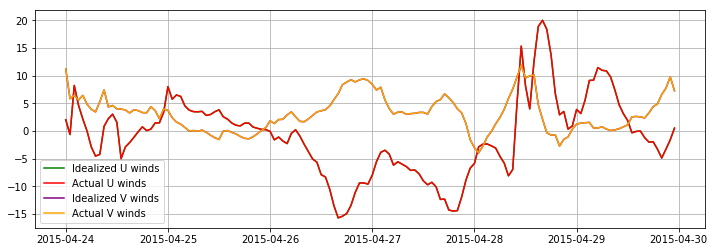

In [281]:
fig, ax = plt.subplots(figsize = (12,4))
dates = np.array([datetime.datetime(2015, 4, 24) + datetime.timedelta(hours = n) 
                  for n in range(24*6)])
list_of_ui = np.array([])
list_of_ur = np.array([])
list_of_vi = np.array([])
list_of_vr = np.array([])
for date in dates:
    vwinds = np.array([])
    uwinds = np.array([])
    for j, i in zip(Yinds, Xinds):
        vwinds = np.append(vwinds, (winds_data.v_wind
                 .isel(gridY=int(j), gridX = int(i))
                 .sel(time=date).values))
        uwinds = np.append(uwinds, (winds_data.u_wind
                 .isel(gridY=int(j), gridX = int(i))
                 .sel(time=date).values))

    z = np.polyfit(range(len(vwinds)), vwinds*np.abs(vwinds) * 10**(-3), 3)
    f = np.poly1d(z) 
    vi = scipy.integrate.quad(f,0, len(vwinds)-1 )[0]
    vr = np.trapz(vwinds*np.abs(vwinds) * 10**(-3))                           
    list_of_vi = np.append(list_of_vi, vi)
    list_of_vr = np.append(list_of_vr, vr)                         

    z = np.polyfit(range(len(uwinds)), uwinds*np.abs(uwinds) * 10**(-3), 3)
    f = np.poly1d(z)
    ui = scipy.integrate.quad(f,0, len(uwinds)-1 )[0]
    ur = np.trapz(uwinds*np.abs(uwinds) * 10**(-3)) 
    list_of_ui = np.append(list_of_ui, ui)
    list_of_ur = np.append(list_of_ur, ur)


ax.plot(dates, list_of_ui, 'g-', label = 'Idealized U winds')
ax.plot(dates, list_of_ur, 'r-', label = 'Actual U winds')
ax.plot(dates, list_of_vi, color='purple', label = 'Idealized V winds')
ax.plot(dates, list_of_vr, color = 'orange', label = 'Actual V winds')

ax.legend()
ax.grid('on');